<h1><center>Connection with Google Sheet</center></h1>

In [162]:
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('DL Workshop-52707c954725.json', scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '1qMBlsO134705quy7EtzPyimSBIUjk9cCi9TjFUMQKJQ'
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("result2")
table = worksheet.get_all_values()
df = pd.DataFrame(table[1:], columns=table[0])
##Only keep columns we need
df = df[['Rk', 'Pk', 'Tm', 'Player', 'College', 'Yrs', 'G', 'MP']]
df = df.apply(pd.to_numeric, errors='ignore')
df.head()

,Rk,Pk,Tm,Player,College,Yrs,G,MP,MP
0,1,1,CLE,Andrew Wiggins,University of Kansas,4,327,11841,36.2
1,2,2,MIL,Jabari Parker,Duke University,4,183,5617,30.7
2,3,3,PHI,Joel Embiid,University of Kansas,2,94,2698,28.7
3,4,4,ORL,Aaron Gordon,University of Arizona,4,263,6867,26.1
4,5,5,UTA,Dante Exum,,3,162,3280,20.2


<h1><center>Introduction to Matpotlib</center></h1>

from matplotlib import pyplot as plt
x = [100, 150, 300, 400]
y = [1, 2, 9, 16]
plt.plot(x, y)
plt.show()

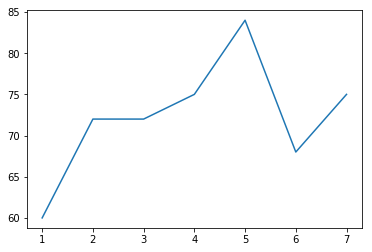

In [160]:
from matplotlib import pyplot as plt
days = [1,2,3,4,5,6,7]
daily_assignments = [60,72,72,75,84,68,75]
plt.plot(days,daily_assignments)
plt.show()

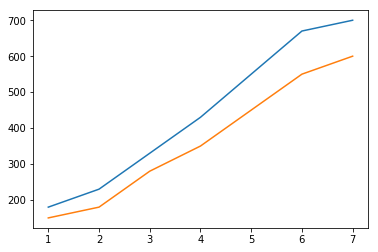

In [161]:
from matplotlib import pyplot as plt
day_of_week = [1, 2, 3, 4, 5,6,7]
# work_days.set_xticklabels(tick_labels.astype(int))
income = [180, 230, 330, 430, 550, 670, 700]
expense = [150, 180, 280, 350, 450, 550, 600]
plt.plot(day_of_week, income)
plt.plot(day_of_week, expense)
plt.show()

<h1><center>Linestyles/Marker: Provide a different color for a line by using the keyword color with either an HTML color name or a HEX code</center></h1>

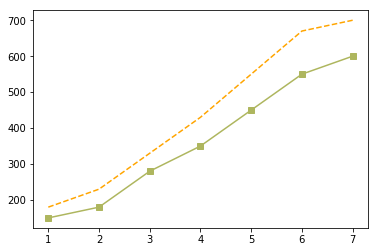

In [177]:
from matplotlib import pyplot as plt
day_of_week = [1, 2, 3, 4,5,6,7]
income = [180, 230, 330, 430, 550, 670, 700]
expense = [150, 180, 280, 350, 450, 550, 600]
plt.plot(day_of_week, income, color='orange',linestyle='--')
plt.plot(day_of_week, expense, color='#AEB65E',marker='s')
plt.show()

<h1><center>Add Legends and Labels</center></h1>

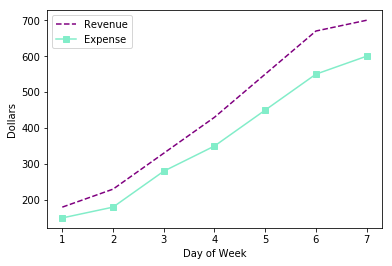

In [168]:
from matplotlib import pyplot as plt
day_of_week = [1, 2, 3, 4,5,6,7]
income = [180, 230, 330, 430, 550, 670, 700]
expense = [150, 180, 280, 350, 450, 550, 600]
plt.plot(day_of_week, income, color='purple',linestyle='--')
plt.plot(day_of_week, expense, color='#82edc9',marker='s')
plt.xlabel('Day of Week')
plt.ylabel('Dollars')
plt.legend(['Revenue', 'Expense'])
plt.show()

<h1><center>Bar Chart</center></h1>

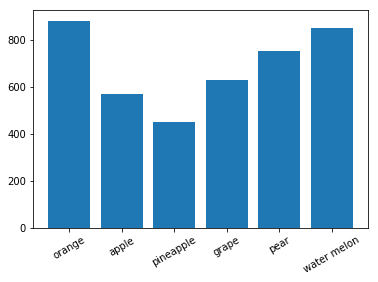

In [171]:
from matplotlib import pyplot as plt
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn 

fruits = ["orange", "apple", "pineapple", "grape", "pear", "water melon"]
production = [880, 570, 450, 630, 750, 850]
plt.bar(range(len(fruits)),production)
# Create your ax object here
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels(["orange", "apple", "pineapple", "grape", "pear", "water melon"], rotation=30)
plt.show()

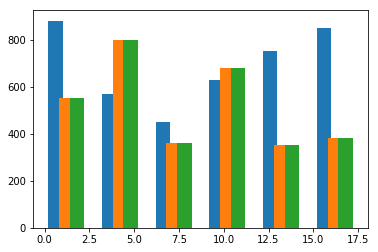

In [174]:
from matplotlib import pyplot as plt
fruits = ["orange", "apple", "pineapple", "grape", "pear", "water melon"]
production1 = [880, 570, 450, 630, 750, 850]
production2 = [550, 800, 360, 680, 350, 380]
production3 = [550, 800, 360, 680, 350, 380]
#Paste the x_values code here
n = 1 # This is our first dataset (n = no. of entry - out of the total) 
t = 3 # Total number of dataset (t = total)
d = 6 # Number of sets of bars (d = dataset of bars) 
w = 0.6 # Width of each bar (w = width)
location1_x = [t*element + w*n for element in range(d)] 
plt.bar(location1_x, production1)
#Paste the x_values code here
n = 2 # This is our second dataset (out of 2) 
t = 3 # Number of dataset
d = 6 # Number of sets of bars
w = 0.6 # Width of each bar
location2_x = [t*element + w*n for element in range(d)]
plt.bar(location2_x, production2)
n = 3 # This is our second dataset (out of 2) 
t = 3 # Number of dataset
d = 6 # Number of sets of bars
w = 0.6 # Width of each bar
location3_x = [t*element + w*n for element in range(d)]
plt.bar(location3_x, production3)
plt.show()

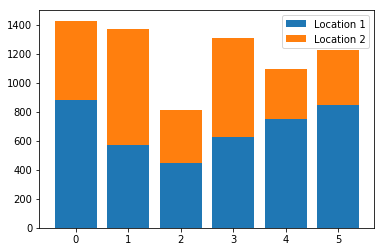

In [175]:
from matplotlib import pyplot as plt
fruits = ["orange", "apple", "pineapple", "grape", "pear", "water melon"]
production1 = [880, 570, 450, 630, 750, 850]
production2 = [550, 800, 360, 680, 350, 380]
plt.bar(range(len(production1)),production1)
plt.bar(range(len(production2)),production2,bottom=production1)
plt.legend(['Location 1', 'Location 2'])
plt.show()

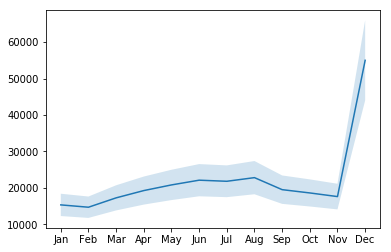

In [179]:
from matplotlib import pyplot as plt
months = range(12)
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sales = [15320, 14680, 17250, 19250, 20800, 22100, 21800, 22800, 19500, 18600,17600, 55000]
plt.plot(months, sales)
ax = plt.subplot()
ax.set_xticks(months)
ax.set_xticklabels(month_names)
y_upper = [i + (i*0.20) for i in sales] 
y_lower = [i - (i*0.20) for i in sales]
plt.fill_between(months, y_lower, y_upper, alpha=0.2)
plt.show()

<h1><center>Pie Chart</center></h1>

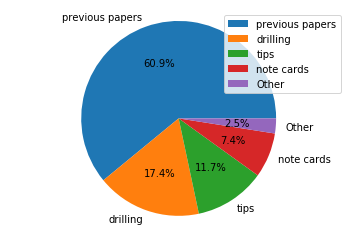

In [180]:
from matplotlib import pyplot as plt
study_methods = ["previous papers", "drilling", "tips", "note cards" , "Other"]
method_usages = [270, 77, 52, 33, 11] 
plt.pie(method_usages,labels=study_methods,autopct='%0.1f%%') 
plt.axis('equal')
plt.legend(study_methods)
plt.savefig('pie.png')
plt.show()

<h1><center>Scatter Plot</center></h1>

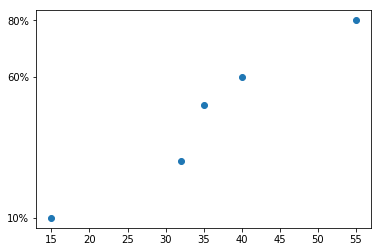

In [155]:
from matplotlib import pyplot as plt
ax = plt.subplot()
plt.plot([15, 32, 35, 40, 55], [0.1, 0.3, 0.5, 0.6, 0.8], 'o')
ax.set_yticks([0.1, 0.6, 0.8])
ax.set_yticklabels(['10%','60%', '80%'])
# ax.set_yticks([0.1, 0.3, 0.6, 0.8])
# ax.set_yticklabels(['10%','30%','60%', '80%'])
plt.show()

<h1><center>Use plt.axis to zoom in to important information</center></h1> 
<h2>This list should contain:</h2> 
<ul>    
    <li>The minimum x-value displayed</li> 
    <li>The maximum x-value displayed</li> 
    <li>The minimum y-value displayed</li> 
    <li>The maximum y-value displayed</li> 
</ul>
<h2>plt.axis([1, 7, 300, 400])</h2>

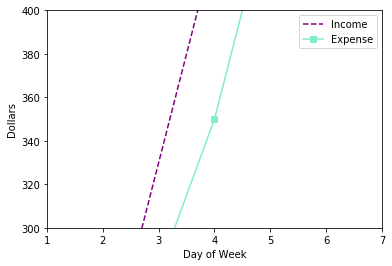

In [54]:
from matplotlib import pyplot as plt
day_of_week = [1, 2, 3, 4,5,6,7]
income = [180, 230, 330, 430, 550, 670, 700]
expense = [150, 180, 280, 350, 450, 550, 600]
plt.plot(day_of_week, income, color='purple',linestyle='--')
plt.plot(day_of_week, expense, color='#82edc9',marker='s')
plt.xlabel('Day of Week')
plt.ylabel('Dollars')
plt.legend(['Income', 'Expense'])
plt.axis([1, 7, 300, 400])
plt.show()

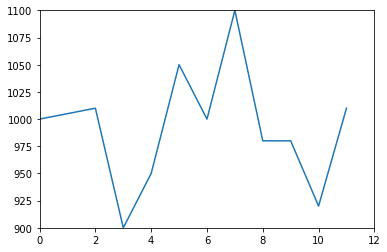

In [65]:
from matplotlib import pyplot as plt
x = range(12)
y = [1000, 1005, 1010, 900, 950, 1050, 1000, 1100, 980, 980, 920, 1010]
plt.plot(x, y)
plt.axis([0, 12, 900, 1100])
plt.show()

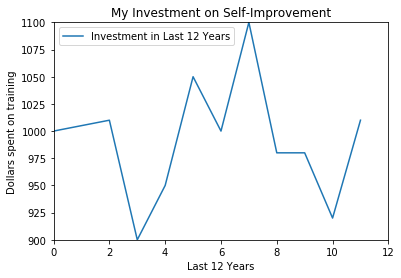

In [71]:
from matplotlib import pyplot as plt
x = range(12)
y = [1000, 1005, 1010, 900, 950, 1050, 1000, 1100, 980, 980, 920, 1010]
plt.plot(x, y)
plt.axis([0, 12, 900, 1100])
plt.legend(['Investment in Last 12 Years']) # add legends
plt.xlabel('Last 12 Years')
plt.ylabel('Dollars spent on training')
plt.title('My Investment on Self-Improvement') # add title
plt.show()

<h1><center>Creating subplots and axes </center><h1>

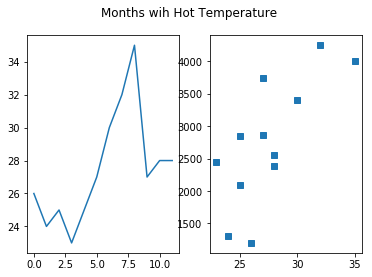

In [96]:
from matplotlib import pyplot as plt
months = range(12)
temperature = [26, 24, 25, 23, 25, 27, 30, 32, 35, 27, 28, 28]
visit_to_beach = [1200, 1300, 2100, 2450, 2850, 3750, 3400, 4250, 4000, 2860, 2390, 2560]
ax, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax.suptitle('Months wih Hot Temperature')
plt.subplot(1, 2, 1)# 1 row 2 columns: 1 column
plt.plot(months, temperature)
plt.subplot(1, 2, 2) # 1 row 2 columns: 2 columns
plt.plot(temperature, visit_to_beach, "s")
plt.show()

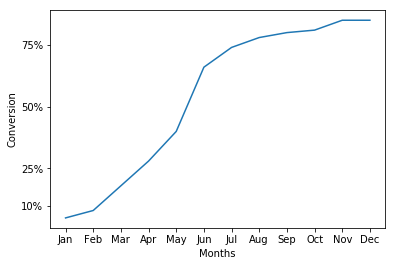

In [126]:
from matplotlib import pyplot as plt
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep","Oct", "Nov", "Dec"]
months = range(12)
conversion = [0.05, 0.08, 0.18, 0.28, 0.4, 0.66, 0.74, 0.78, 0.8, 0.81, 0.85, 0.85]
plt.xlabel("Months")
plt.ylabel("Conversion")
plt.plot(months, conversion)
# Your work here
ax = plt.subplot()
# measuring units and lables
ax.set_xticks(range(12))
ax.set_xticklabels(month_names[0:12])
ax.set_yticks([0.10, 0.25, 0.5, 0.75])
ax.set_yticklabels(['10%', '25%', '50%','75%'])
plt.show()

Air Quality Ranking

    Rank          City  AQI Air Quality Level  PM2.5  PM10
0      1        Urumqi   30         Excellent     11    21
1      2     Changchun   50         Excellent     29    51
2      3        Dalian   53              Good     26    56
3      4         Lhasa   52              Good     20    58
4      5         Sanya   55              Good     20    60
5      6      Shenyang   56              Good     33    63
6      7       Kunming   57              Good     36    59
7      8      Hangzhou   59              Good     27    65
8      9        Haikou   59              Good     30    68
9     10       Qingdao   68              Good     28    85
10    11     Changsha    69              Good     33    88
11    12     Chongqing   69              Good     26    87
12    13      Shenzhen   70              Good     37    91
13    14        Suzhou   72              Good     33   102
14    15        Fuzhou   72              Good     31    94
15    16         Wuhan   74        

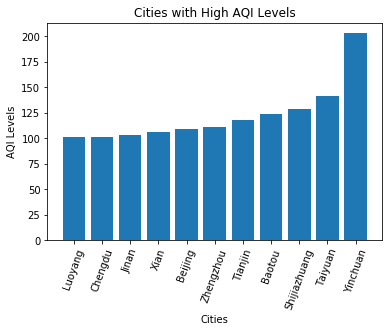

In [163]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Fetch URL
html_page = requests.get('https://www.travelchinaguide.com/climate/air-pollution.htm') 
# Obtain the entire HTML page
soup = BeautifulSoup(html_page.content,'html.parser')
# Find all the HTML tables 
tables = soup.find_all(class_="c_tableX")
# Access the first HTML table that contains Air Quality information (header + data)
table = tables[1]
# Obtaih air quality column header descriptions from the first HTML table
table_header = table.find(class_="c_tableX_th")
# Extract the header names from the 'td' elements of the header table and store in the variable 'tds'
tds = table_header.find_all('td')
# Create two empty lists for holding the air quality header names and air quality data
header = []
data = []
# Loop through the table cells (i.e. 'tds') to extract header names and append to the list
for i in tds:
    # print(i.text)
    header.append(i.text)
# print header
all_rows = table.find_all("tr")
# print data_rows.text
for i, row in enumerate(all_rows,1):
        # print row.text
        if (i < len(all_rows)):
            tds = all_rows[i].find_all("td")
            for j, td in enumerate(tds,1):
                # print j,td.text
                if j==1:
                    rank = td.text
                if j==2:
                    city = td.text
                if j==3:
                    province = td.text
                if j==4:
                    aqi = td.text
                if j==5:
                    air_quality = td.text
                if j==6:
                    pm2_5 = td.text
                if j==7:
                    pm10 = td.text
            data.append([rank,city,province,aqi,air_quality,pm2_5,pm10])
# Assign row data and column headers to dataframe         
df = pd.DataFrame(data,
  columns = header
)
# Save dataframe to external csv file
df.to_csv('china_air_quality.csv', sep='\t', encoding='utf-8')
# open csv file and read csv data into Pandas dataframe
df = pd.read_csv("china_air_quality.csv",sep='\t', encoding='utf-8')
# Set column headings for entire air quality table and print out the entire table
air_quality_ranking = df[['Rank','City','AQI','Air Quality Level','PM2.5','PM10']]
# ////////////////////////////////////////////////////////////////////
# Display City Ranking by Pollution Level
# ////////////////////////////////////////////////////////////////////
print("Air Quality Ranking\n")
print(air_quality_ranking)
# Extract cities that are polluted
lightly_polluted = df[df['Air Quality Level'] == 'Lightly Polluted']
heavily_polluted = df[df['Air Quality Level'] == 'Heavily Polluted']
# Combine the cities of different pollution level into one table
selected = lightly_polluted.append(heavily_polluted)
pc = selected[['Rank','City','AQI','Air Quality Level','PM2.5','PM10']]
# ////////////////////////////////////////////////////////////////////
# Display Cities with Pollution
# ////////////////////////////////////////////////////////////////////
print("\nCities with Pollution\n")
print(pc)
cities = pc['City'].tolist()
aqi_lvl = pc['AQI'].tolist()
ax = plt.subplot()
plt.bar(range(len(cities)),aqi_lvl)
# Create ax object here
j = 0
ax_list = []
while j<len(cities):
    ax_list.append(j)
    j += 1
ax.set_xticks(ax_list)
plt.xlabel('Cities')
plt.ylabel('AQI Levels')
plt.title('Cities with High AQI Levels')
ax.set_xticklabels(cities, rotation=70)
plt.show()

In [165]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Fetch URL
html_page = requests.get('https://www.travelchinaguide.com/climate/air-pollution.htm') 
# Obtain the entire HTML page
soup = BeautifulSoup(html_page.content,'html.parser')
# Find all the HTML tables 
tables = soup.find_all(class_="c_tableX")
# Access the first HTML table that contains Air Quality information (header + data)
table = tables[1]
# Obtaih air quality column header descriptions from the first HTML table
table_header = table.find(class_="c_tableX_th")
# Extract the header names from the 'td' elements of the header table and store in the variable 'tds'
tds = table_header.find_all('td')
# Create two empty lists for holding the air quality header names and air quality data
header = []
data = []
# Loop through the table cells (i.e. 'tds') to extract header names and append to the list
for i in tds:
    # print(i.text)
    header.append(i.text)
# print header
all_rows = table.find_all("tr")
# print data_rows.text
for i, row in enumerate(all_rows,1):
        # print row.text
        if (i < len(all_rows)):
            tds = all_rows[i].find_all("td")
            for j, td in enumerate(tds,1):
                # print j,td.text
                if j==1:
                    rank = td.text
                if j==2:
                    city = td.text
                if j==3:
                    province = td.text
                if j==4:
                    aqi = td.text
                if j==5:
                    air_quality = td.text
                if j==6:
                    pm2_5 = td.text
                if j==7:
                    pm10 = td.text
            data.append([rank,city,province,aqi,air_quality,pm2_5,pm10])
# Assign row data and column headers to dataframe         
df = pd.DataFrame(data,
  columns = header
)
# Save dataframe to external csv file
df.to_csv('china_air_quality.csv', sep='\t', encoding='utf-8')
# open csv file and read csv data into Pandas dataframe



Air Quality Ranking

    Rank          City  AQI Air Quality Level  PM2.5  PM10
0      1        Urumqi   30         Excellent     11    21
1      2     Changchun   50         Excellent     29    51
2      3        Dalian   53              Good     26    56
3      4         Lhasa   52              Good     20    58
4      5         Sanya   55              Good     20    60
5      6      Shenyang   56              Good     33    63
6      7       Kunming   57              Good     36    59
7      8      Hangzhou   59              Good     27    65
8      9        Haikou   59              Good     30    68
9     10       Qingdao   68              Good     28    85
10    11      Changsha   69              Good     33    88
11    12     Chongqing   69              Good     26    87
12    13      Shenzhen   70              Good     37    91
13    14        Suzhou   72              Good     33   102
14    15        Fuzhou   72              Good     31    94
15    16         Wuhan   74        

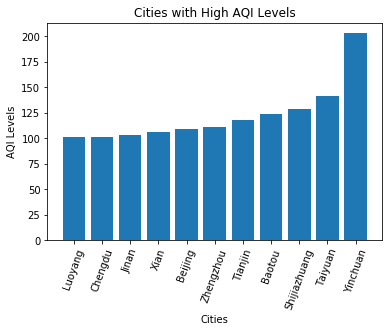

In [166]:
import gspread
import pandas as pd
from oauth2client.service_account import ServiceAccountCredentials
import requests
import csv
import matplotlib.pyplot as plt

scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('DL Workshop-52707c954725.json', scope)
gc = gspread.authorize(credentials)
spreadsheet_key = '1qMBlsO134705quy7EtzPyimSBIUjk9cCi9TjFUMQKJQ'
book = gc.open_by_key(spreadsheet_key)
worksheet = book.worksheet("air_quality")
table = worksheet.get_all_values()
df = pd.DataFrame(table[1:], columns=table[0])
##Only keep columns we need
df = df[['Rank', 'City', 'AQI', 'Air Quality Level', 'PM2.5', 'PM10']]
df = df.apply(pd.to_numeric, errors='ignore')
df.head()

# df = pd.read_csv("china_air_quality.csv",sep='\t', encoding='utf-8')
# Set column headings for entire air quality table and print out the entire table
air_quality_ranking = df[['Rank','City','AQI','Air Quality Level','PM2.5','PM10']]
# ////////////////////////////////////////////////////////////////////
# Display City Ranking by Pollution Level
# ////////////////////////////////////////////////////////////////////
print("Air Quality Ranking\n")
print(air_quality_ranking)
# Extract cities that are polluted
lightly_polluted = df[df['Air Quality Level'] == 'Lightly Polluted']
heavily_polluted = df[df['Air Quality Level'] == 'Heavily Polluted']
# Combine the cities of different pollution level into one table
selected = lightly_polluted.append(heavily_polluted)
pc = selected[['Rank','City','AQI','Air Quality Level','PM2.5','PM10']]
# ////////////////////////////////////////////////////////////////////
# Display Cities with Pollution
# ////////////////////////////////////////////////////////////////////
print("\nCities with Pollution\n")
print(pc)
cities = pc['City'].tolist()
aqi_lvl = pc['AQI'].tolist()
ax = plt.subplot()
plt.bar(range(len(cities)),aqi_lvl)
# Create ax object here
j = 0
ax_list = []
while j<len(cities):
    ax_list.append(j)
    j += 1
ax.set_xticks(ax_list)
plt.xlabel('Cities')
plt.ylabel('AQI Levels')
plt.title('Cities with High AQI Levels')
ax.set_xticklabels(cities, rotation=70)
plt.show()